Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [2]:
# Defining the path for train and test images
data_dir_train = pathlib.Path('C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
data_dir_test = pathlib.Path('C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [3]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Create a dataset

Define some parameters for the loader:

In [4]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [5]:
## Train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split=0.2, subset='training', label_mode='categorical', image_size=(img_height, img_width), batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 6112 files for training.


In [6]:
## Validation dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, validation_split=0.2, subset='validation', label_mode='categorical', image_size=(img_height, img_width), batch_size=batch_size)

Found 7639 files belonging to 9 classes.
Using 1527 files for validation.


In [7]:
# Listing out all the classes of skin cancer and storing them in a list. 

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Creating a dataframe with path to images

In [8]:
from glob import glob
path_list_original = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list_original

['C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025780.jpg',
 'C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025803.jpg',
 'C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025825.jpg',
 'C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025953.jpg',
 'C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_0025957.jpg',
 'C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\ISIC_002599

In [9]:
lesion_list_original = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_original

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [10]:
dataframe_dict_original = dict(zip(path_list_original, lesion_list_original))

In [11]:
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

In [12]:
original_df

,Path,Label
0,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,actinic keratosis
1,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,actinic keratosis
2,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,actinic keratosis
3,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,actinic keratosis
4,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,actinic keratosis
...,...,...
2234,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,vascular lesion
2235,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,vascular lesion
2236,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,vascular lesion
2237,C:\Users\arabi\Downloads\UPGRAD IITB\CNN_assig...,vascular lesion


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

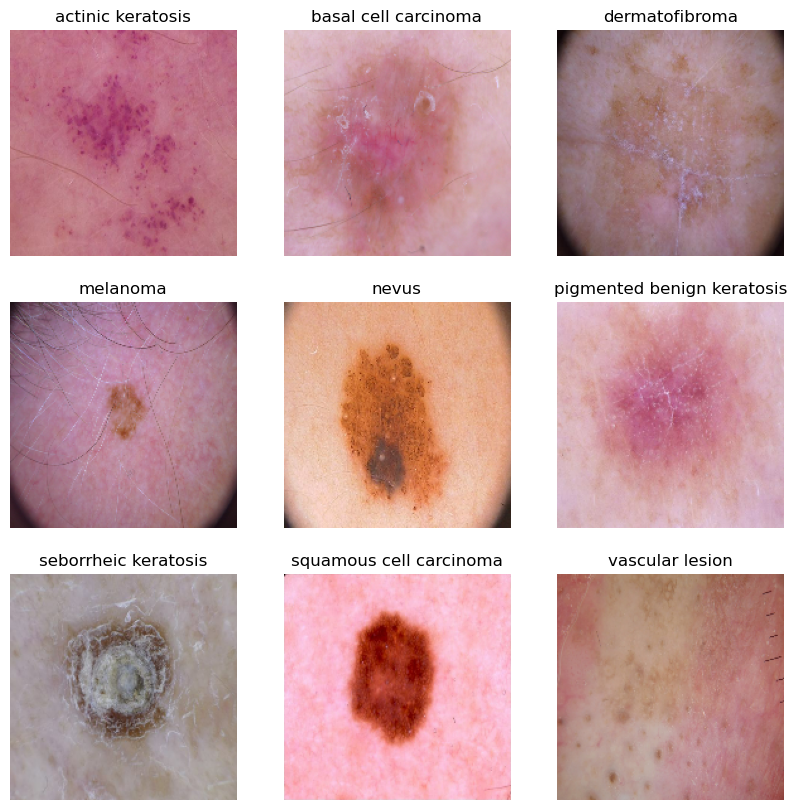

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# CNN Model Creation

## Model 1.1 : Conv Layer with Batch Normalization, MaxPooling

### Model Structure

In [15]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))

model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))

C:\Users\arabi\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model

In [16]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [17]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      66,355,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           4,617 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 66,426,665 (253.40 MB)

 Trainable params: 66,426,281 (253.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the model

In [18]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - accuracy: 0.2392 - loss: 21.9926 - val_accuracy: 0.0923 - val_loss: 199.2359
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.3050 - loss: 1.7849 - val_accuracy: 0.1788 - val_loss: 80.5488
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.3700 - loss: 1.6562 - val_accuracy: 0.3052 - val_loss: 3.1579
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.4112 - loss: 1.4424 - val_accuracy: 0.4427 - val_loss: 1.4259
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.4589 - loss: 1.3081 - val_accuracy: 0.3432 - val_loss: 1.6642
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.4903 - loss: 1.2543 - val_accuracy: 0.4060 - val_loss: 1.4705
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.5544 - loss: 1.0817 - val_accuracy: 0.4656 - val_loss: 1.3799
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 10190s 54s/step - accuracy: 0.5951 - loss: 0.9860 - v

### Visualizing training results

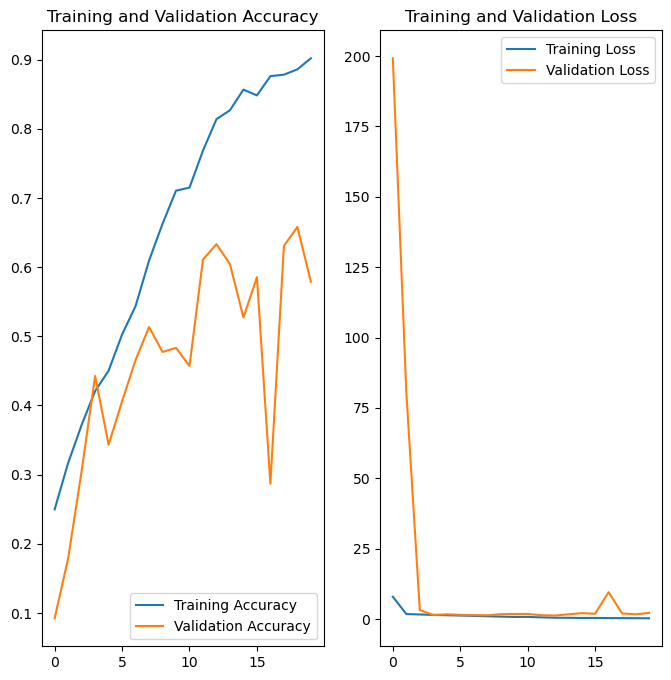

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations from Model 1.1
- Model is clearly overfitting with 80% train accuracy and 42% validation accuracy
- This could be due to absence of dropout layer or regularization

## Model 1.2 : Adding L2 Regularization

### Model Structure

In [20]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=keras.regularizers.l2(0.01)))
model.add(layers.Activation('relu'))

model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))

In [21]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [22]:
# View the summary of all layers
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      66,355,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           4,617 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 66,426,665 (253.40 MB)

 Trainable params: 66,426,281 (253.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the Model

In [23]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.2279 - loss: 36.8669 - val_accuracy: 0.0668 - val_loss: 31.5822
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.3069 - loss: 3.7323 - val_accuracy: 0.1598 - val_loss: 2.7369
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.3207 - loss: 2.0119 - val_accuracy: 0.2528 - val_loss: 2.0376
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.3411 - loss: 1.7640 - val_accuracy: 0.2803 - val_loss: 1.8561
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.3378 - loss: 1.6759 - val_accuracy: 0.3255 - val_loss: 1.7425
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.3655 - loss: 1.6328 - val_accuracy: 0.2888 - val_loss: 1.8271
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 222s 1s/step - accuracy: 0.4031 - loss: 1.5874 - val_accuracy: 0.3582 - val_loss: 1.8130
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 221s 1s/step - accuracy: 0.4174 - loss: 1.5996 - val_ac

### Visualizing Training Results

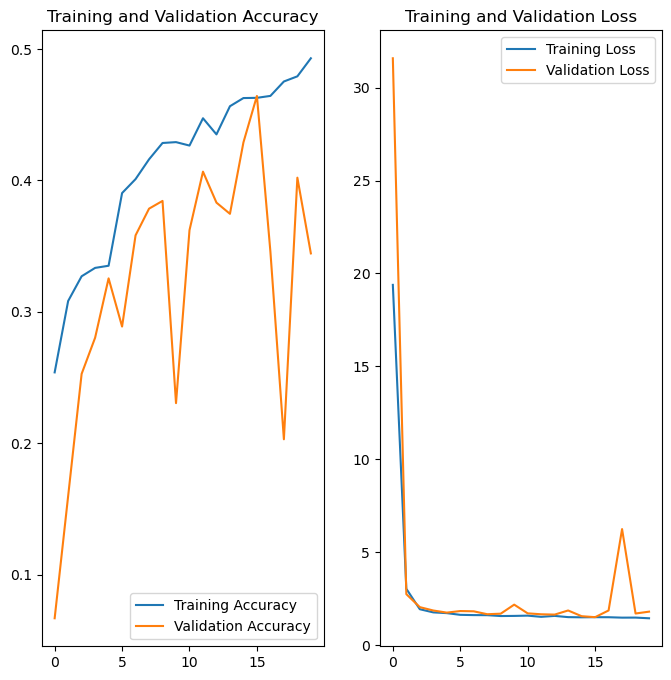

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations from model 1.2
- With the addition of L2 regularization the training accuracy drops to 63% while validation accuracy improves to 50%
- This is not a overfitting model but the overall accuracy is low

## Model 1.3 : Adding dropout layer to first model

### Model Structure

In [25]:
model = Sequential()
model.add(layers.Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), padding="same"))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(len(class_names)))
model.add(layers.Activation('softmax'))

In [26]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [27]:
# View the summary of all layers
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 180, 180, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 90, 90, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │      66,355,712 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 66,426,665 (253.40 MB)

 Trainable params: 66,426,281 (253.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Training the model 

In [28]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - accuracy: 0.1976 - loss: 35.4168 - val_accuracy: 0.1382 - val_loss: 85.9167
Epoch 2/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1747 - loss: 2.1396 - val_accuracy: 0.1460 - val_loss: 41.7991
Epoch 3/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1832 - loss: 2.0690 - val_accuracy: 0.1938 - val_loss: 4.0339
Epoch 4/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.2069 - loss: 2.0506 - val_accuracy: 0.2737 - val_loss: 1.8852
Epoch 5/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1891 - loss: 2.0861 - val_accuracy: 0.2999 - val_loss: 1.8418
Epoch 6/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.2180 - loss: 1.9809 - val_accuracy: 0.2574 - val_loss: 1.8808
Epoch 7/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1797 - loss: 2.0714 - val_accuracy: 0.2161 - val_loss: 1.8849
Epoch 8/20
191/191 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.1862 - loss: 2.0356 - val_a

### Visualizing Training Results

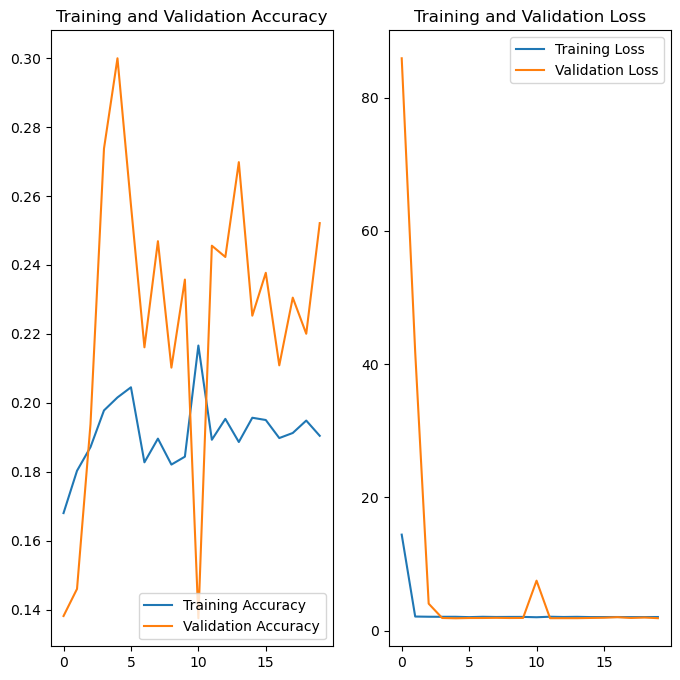

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observation from Model 1.3
- Addition of dropout layers after Conv and dense layer reduced the training and validation accuracy to 30% and 36% respectively.
- Higher validation accuracy means that the dropout layer is dropping some significant information of previous layer leading to very less accuracy

# Distribution of classes in the training dataset

In [30]:
def count_class_distribution(directory):
    
    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))
    
    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]
    
    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = count_class_distribution(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


<Axes: xlabel='No. of Image', ylabel='Class'>

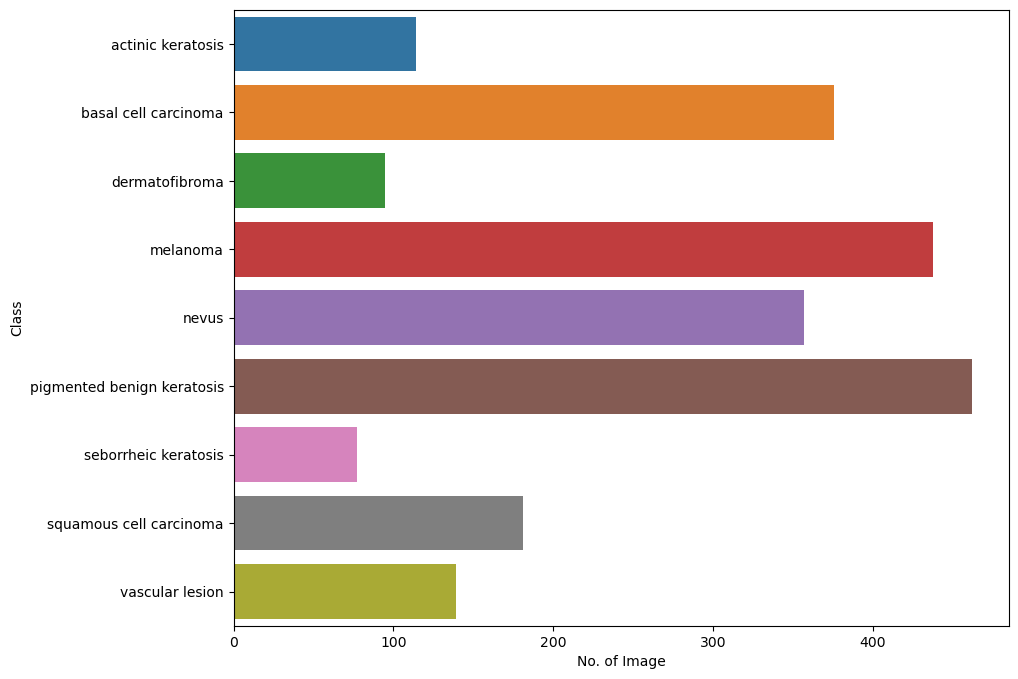

In [31]:
#Visualize the Number of image in each class.
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

## Class Distribution Findings:
- 'seborrheic kertosis' class has least number(77) of samples out of 2357 samples
-  'pigmented benign keratosis' class has highest number(462) of samples out of 2357 samples


# Rectifying the class imbalance

In [32]:
!pip install Augmentor

In [33]:
path_to_training_dataset = "C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

In [34]:
import Augmentor

In [35]:
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(600) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x203DC23FCD0>: 100%|█| 600/600 [00:02<00:00, 250.78 Samples


Initialised with 376 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x203DC0BE490>: 100%|█| 600/600 [00:02<00:00, 252.49 Samples


Initialised with 95 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x203DC0CCCD0>: 100%|█| 600/600 [00:02<00:00, 251.28 Samples


Initialised with 438 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x203DC1A2250>: 100%|█| 600/600 [00:12<00:00, 47.34 Samples


Initialised with 357 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=824x719 at 0x203DC1E0A10>: 100%|█| 600/600 [00:10<00:


Initialised with 462 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x203DC089E50>: 100%|█| 600/600 [00:02<00:00, 251.92 Samples


Initialised with 77 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x203DC1A3390>: 100%|█| 600/600 [00:05<00


Initialised with 181 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x203DD7DD6D0>: 100%|█| 600/600 [00:02<00:00, 253.03 Samples


Initialised with 139 image(s) found.
Output directory set to C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x203DC1B3D10>: 100%|█| 600/600 [00:02<00:00, 245.14 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [36]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

10800


# Distribution of augmented data after adding new images to the original training data.

In [37]:
from glob import glob
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new[0]

'C:\\Users\\arabi\\Downloads\\UPGRAD IITB\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_08ef835d-e193-4b70-97c1-88b16866e60b.jpg'

In [38]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [39]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [41]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2], ignore_index=True)

In [42]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    1662
melanoma                      1638
basal cell carcinoma          1576
nevus                         1557
squamous cell carcinoma       1381
vascular lesion               1339
actinic keratosis             1314
dermatofibroma                1295
seborrheic keratosis          1277
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

## Model 1.4: Training the model on data created using Augmentor

In [43]:
batch_size = 32
img_height = 180
img_width = 180

### Creating a training dataset

In [44]:
data_dir_train=pathlib.Path('C:/Users/arabi/Downloads/UPGRAD IITB/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  label_mode='categorical',
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13039 files belonging to 9 classes.
Using 10432 files for training.


### Creating a validation dataset

In [45]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  label_mode='categorical',
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13039 files belonging to 9 classes.
Using 2607 files for validation.


### Model Structure

In [46]:
model = Sequential()

model.add(layers.Rescaling(1./255,input_shape=(180,180,3)))   #Rescaling Layer


model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))


model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(len(class_names),activation='softmax'))

C:\Users\arabi\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
### Choosing an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

### Training the model

In [48]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 70s 207ms/step - accuracy: 0.2393 - loss: 2.0148 - val_accuracy: 0.4634 - val_loss: 1.4365
Epoch 2/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 67s 204ms/step - accuracy: 0.4671 - loss: 1.4134 - val_accuracy: 0.4987 - val_loss: 1.3835
Epoch 3/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 67s 204ms/step - accuracy: 0.5484 - loss: 1.2022 - val_accuracy: 0.6241 - val_loss: 1.0317
Epoch 4/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 67s 204ms/step - accuracy: 0.6222 - loss: 1.0242 - val_accuracy: 0.6686 - val_loss: 0.8947
Epoch 5/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 68s 209ms/step - accuracy: 0.6919 - loss: 0.8375 - val_accuracy: 0.7614 - val_loss: 0.7012
Epoch 6/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 69s 212ms/step - accuracy: 0.7503 - loss: 0.6826 - val_accuracy: 0.7975 - val_loss: 0.5560
Epoch 7/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 69s 211ms/step - accuracy: 0.7738 - loss: 0.6106 - val_accuracy: 0.8270 - val_loss: 0.4715
Epoch 8/30
326/326 ━━━━━━━━━━━━━━━━━━━━ 69s 212ms/step - accuracy: 0.8060 - loss: 0

### Visualizing the model results

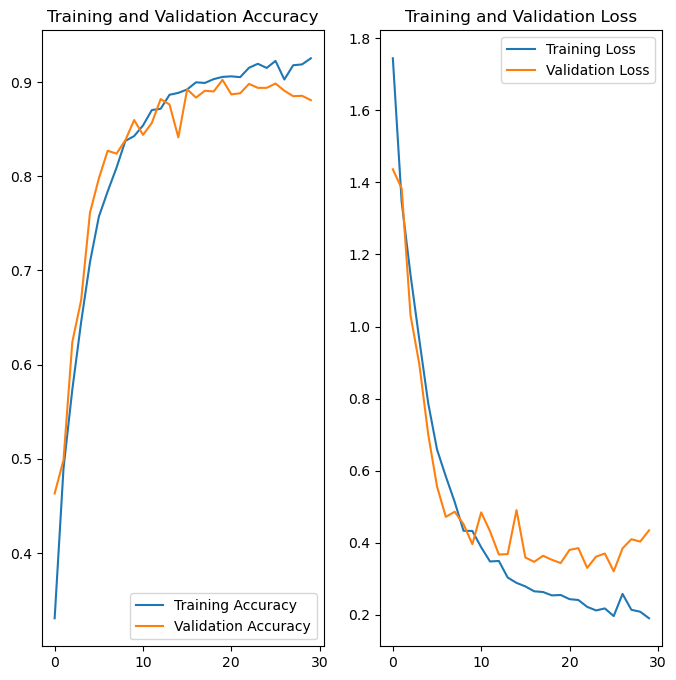

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observation from Model 1.4
- Adding a Conv layer with 128 filters and reducing the number of neurons in dense layer to 128 from 512 significantly improved both training and validation accuracy

- With the above changes the training accuracy improves to 91% and validation accuracy improves to 83%

In [50]:
keras.__version__

'3.4.0'